In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
# df = pd.read_csv(os.path.join('data','MBTA_Monthly_Ridership_By_Mode_and_Line.csv'))

In [4]:
def load_data(file_path):
    """Load the CSV data."""
    return pd.read_csv(file_path)

def preprocess_data(df):
    """Preprocess the data by filtering, creating new columns, and aggregating data."""
    # Filter the dataframe to keep only rows for selected routes
    selected_routes = ['All Bus', 'Private Bus', 'Silver Line']
    df = df[df['route_or_line'].isin(selected_routes)]
    
    # Convert 'month_of_service' to datetime and create necessary columns
    df['month_of_service'] = pd.to_datetime(df['month_of_service'])
    df['year'] = df['month_of_service'].dt.year
    df['half_year'] = ((df['month_of_service'].dt.month - 1) // 6) + 1
    df['period'] = df['year'].astype(str) + '-H' + df['half_year'].astype(str)
    df['pandemic_period'] = df['month_of_service'].dt.year >= 2020
    df['pandemic_period'] = df['pandemic_period'].map({True: 'After Pandemic', False: 'Before Pandemic'})

    return df

def aggregate_data(df):
    """Aggregate data by 6-month periods and create a pivot table."""
    period_data = df.groupby(['period', 'route_or_line'])['ridership_total'].sum().reset_index()
    pivot_data = period_data.pivot(index='period', columns='route_or_line', values='ridership_total')
    return pivot_data

def plot_ridership_trends(pivot_data):
    """Plot ridership trends using plotly."""
    fig = go.Figure()
    
    for route in pivot_data.columns:
        fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data[route], mode='lines+markers', name=route))
    
    fig.update_layout(
        title='Ridership Trends by Route (6-Month Intervals)',
        xaxis_title='6-Month Period',
        yaxis_title='Total Ridership',
        showlegend=True
    )
    fig.update_xaxes(tickangle=45)
    fig.show()
    pio.write_html(fig, "./Plots/Ridership/Ridership_trends_route.html")

def compare_pre_post_pandemic(df):
    """Compare pre-pandemic and post-pandemic ridership and plot the results."""
    pre_post_comparison = df.groupby(['route_or_line', 'pandemic_period'])['ridership_total'].mean().reset_index()
    pre_post_pivot = pre_post_comparison.pivot(index='route_or_line', columns='pandemic_period', values='ridership_total')
    
    # Calculate the percent change
    if 'Before Pandemic' in pre_post_pivot.columns and 'After Pandemic' in pre_post_pivot.columns:
        pre_post_pivot['Percent Change'] = ((pre_post_pivot['After Pandemic'] - pre_post_pivot['Before Pandemic']) / 
                                          pre_post_pivot['Before Pandemic'] * 100)
    
    # Plot the bar chart using plotly
    fig = px.bar(pre_post_comparison, x='route_or_line', y='ridership_total', color='pandemic_period',
                 title='Average Ridership Before and After Pandemic by Route',
                 labels={'ridership_total': 'Average Ridership per 6-Month Period'})
    
    fig.update_layout(xaxis_title='Route', yaxis_title='Average Ridership')
    fig.update_xaxes(tickangle=45)
    fig.show()
    pio.write_html(fig, "./Plots/Ridership/Prepandemic_vs_Postpandemic.html")
    
    return pre_post_pivot

def print_percent_change(pre_post_pivot):
    """Print the percent change in ridership between before and after the pandemic."""
    if 'Percent Change' in pre_post_pivot.columns:
        print("Percent Change in Average Ridership (Before vs After Pandemic):")
        print(pre_post_pivot.sort_values('Percent Change', ascending=False))

def main():
    # Define file path
    file_path = os.path.join('data', 'MBTA_Monthly_Ridership_By_Mode_and_Line.csv')

    # Load and preprocess data
    df = load_data(file_path)
    df = preprocess_data(df)

    # Aggregate data
    pivot_data = aggregate_data(df)

    # Plot ridership trends
    plot_ridership_trends(pivot_data)

    # Compare pre-pandemic and post-pandemic ridership
    pre_post_pivot = compare_pre_post_pandemic(df)

    # Print the percent change table
    print_percent_change(pre_post_pivot)

main()

C:\Users\astha\AppData\Local\Temp\ipykernel_16060\2411114795.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\astha\AppData\Local\Temp\ipykernel_16060\2411114795.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\astha\AppData\Local\Temp\ipykernel_16060\2411114795.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Percent Change in Average Ridership (Before vs After Pandemic):
pandemic_period  After Pandemic  Before Pandemic  Percent Change
route_or_line                                                   
Silver Line        3.279794e+05     4.855364e+05      -32.450087
All Bus            3.230676e+06     4.846938e+06      -33.346048
Private Bus        2.698979e+04     7.595908e+04      -64.467988


In [ ]:
# df.isna().sum()
# # Define list of route/line values you want to keep
# selected_routes = ['All Bus', 'Private Bus', 'Silver Line']

# # Filter the dataframe to keep only rows where route_ot_line is in the list
# df = df[df['route_or_line'].isin(selected_routes)]

C:\Users\astha\AppData\Local\Temp\ipykernel_37324\4197588259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_of_service'] = pd.to_datetime(df['month_of_service'])
C:\Users\astha\AppData\Local\Temp\ipykernel_37324\4197588259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['month_of_service'].dt.year
C:\Users\astha\AppData\Local\Temp\ipykernel_37324\4197588259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

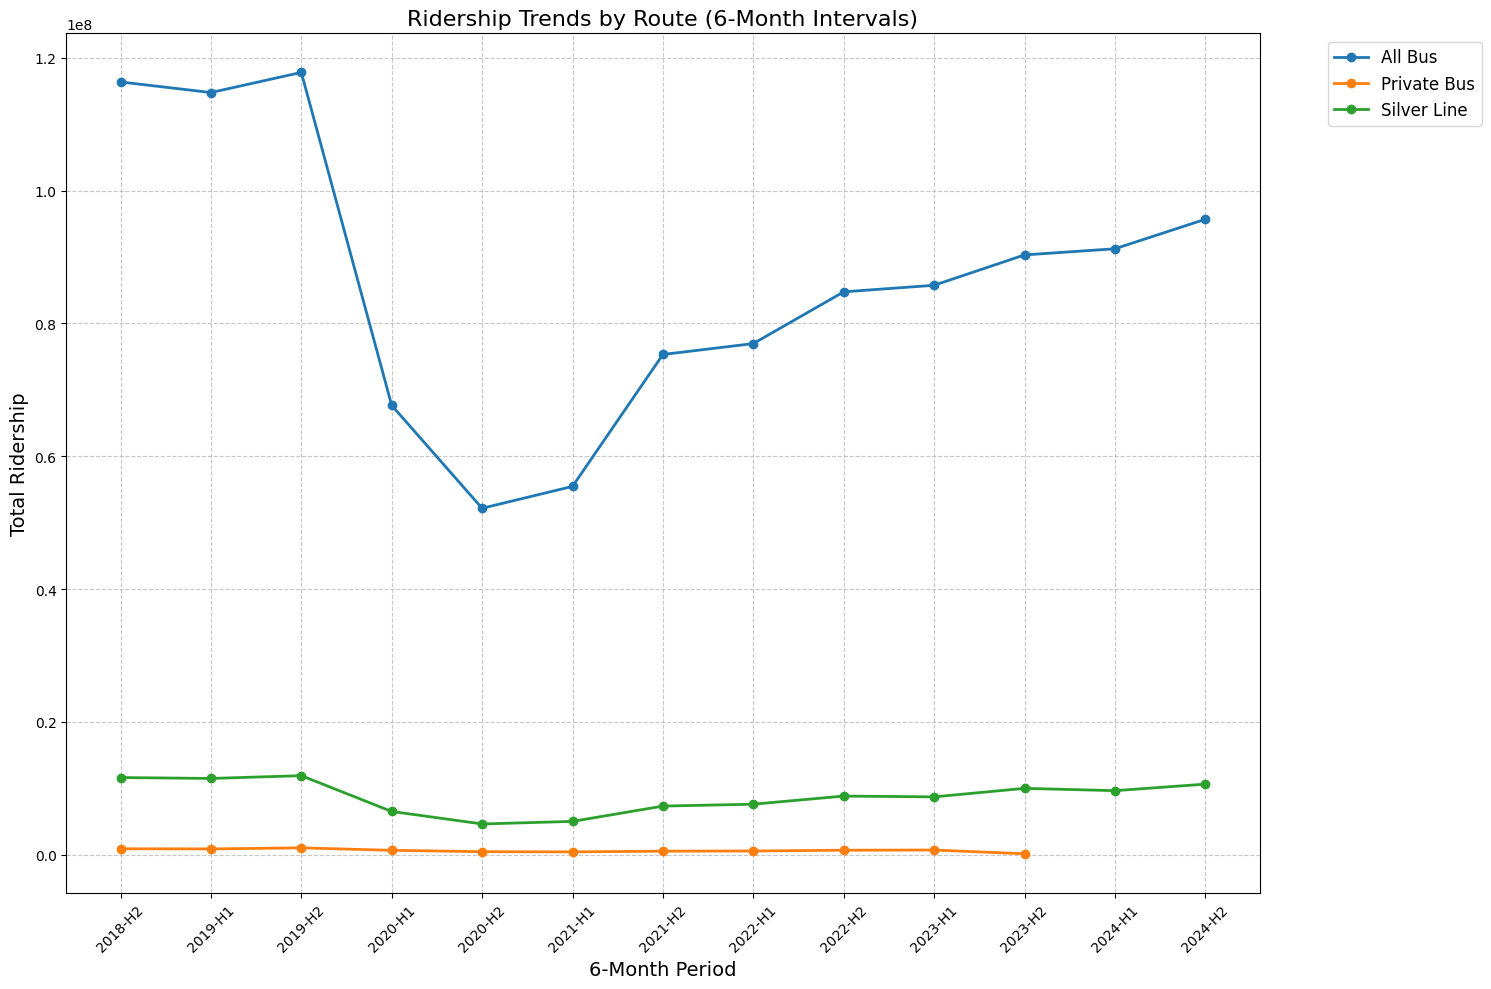

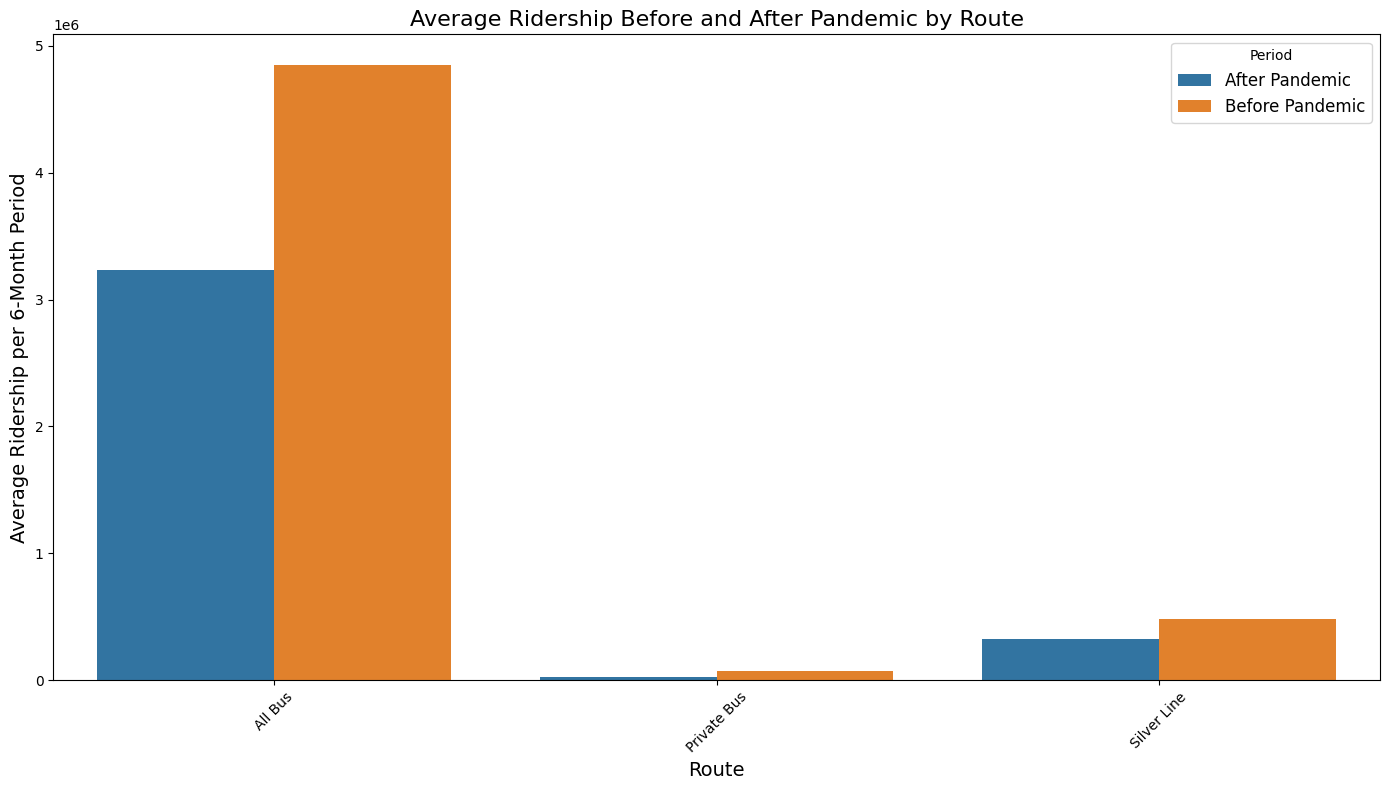

Percent Change in Average Ridership (Before vs After Pandemic):
pandemic_period  After Pandemic  Before Pandemic  Percent Change
route_or_line                                                   
Silver Line        3.279794e+05     4.855364e+05      -32.450087
All Bus            3.230676e+06     4.846938e+06      -33.346048
Private Bus        2.698979e+04     7.595908e+04      -64.467988


In [ ]:
# # Convert month_of_service to datetime
# df['month_of_service'] = pd.to_datetime(df['month_of_service'])

# # Create a 6-month period column
# df['year'] = df['month_of_service'].dt.year
# df['half_year'] = ((df['month_of_service'].dt.month - 1) // 6) + 1
# df['period'] = df['year'].astype(str) + '-H' + df['half_year'].astype(str)

# # Add a pandemic indicator (before/after 2020)
# df['pandemic_period'] = df['month_of_service'].dt.year >= 2020
# df['pandemic_period'] = df['pandemic_period'].map({True: 'After Pandemic', False: 'Before Pandemic'})

# # Aggregate data by 6-month periods for each route
# period_data = df.groupby(['period', 'route_or_line'])['ridership_total'].sum().reset_index()

# # Create a pivot table for easier plotting
# pivot_data = period_data.pivot(index='period', columns='route_or_line', values='ridership_total')

# # colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
# #           '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
# #           '#9a6324', '#fffac8', '#800000', '#aaffc3']

# # Plot ridership trends over 6-month periods for each route
# plt.figure(figsize=(15, 10))
# for i,route in enumerate(pivot_data.columns):
#     plt.plot(pivot_data.index, pivot_data[route], label=route, marker='o', linewidth=2)

# plt.title('Ridership Trends by Route (6-Month Intervals)', fontsize=16)
# plt.xlabel('6-Month Period', fontsize=14)
# plt.ylabel('Total Ridership', fontsize=14)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Compare pre-pandemic and post-pandemic ridership for each route
# pre_post_comparison = df.groupby(['route_or_line', 'pandemic_period'])['ridership_total'].mean().reset_index()
# pre_post_pivot = pre_post_comparison.pivot(index='route_or_line', columns='pandemic_period', values='ridership_total')

# # Calculate the percent change (handle cases where 'Before Pandemic' might be missing)
# if 'Before Pandemic' in pre_post_pivot.columns and 'After Pandemic' in pre_post_pivot.columns:
#     pre_post_pivot['Percent Change'] = ((pre_post_pivot['After Pandemic'] - pre_post_pivot['Before Pandemic']) / 
#                                       pre_post_pivot['Before Pandemic'] * 100)

# # Plot the comparison as a bar chart
# plt.figure(figsize=(14, 8))
# sns.barplot(x='route_or_line', y='ridership_total', hue='pandemic_period', data=pre_post_comparison)
# plt.title('Average Ridership Before and After Pandemic by Route', fontsize=16)
# plt.xlabel('Route', fontsize=14)
# plt.ylabel('Average Ridership per 6-Month Period', fontsize=14)
# plt.xticks(rotation=45)
# plt.legend(title='Period', fontsize=12)
# plt.tight_layout()
# plt.show()

# # # Create a heatmap to visualize the changes over time for all routes
# # heatmap_data = pivot_data.T  # Transpose for better visualization
# # plt.figure(figsize=(16, 10))
# # sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".0f", linewidths=.5)
# # plt.title('Ridership Heatmap by Route and 6-Month Period', fontsize=16)
# # plt.ylabel('Route', fontsize=14)
# # plt.xlabel('6-Month Period', fontsize=14)
# # plt.tight_layout()
# # plt.show()

# # Print the percent change table
# if 'Percent Change' in pre_post_pivot.columns:
#     print("Percent Change in Average Ridership (Before vs After Pandemic):")
#     print(pre_post_pivot.sort_values('Percent Change', ascending=False))

## Analysis

From the above data we can see that most routes experienced a significant drop in ridership around 2020-H1, likely due to the COVID-19 pandemic. There's a gradual recovery in ridership across most routes from 2020-H2 onwards, though not reaching pre-pandemic levels for many routes.

**Route-Specific Observations**
- Heavy Rail shows the highest ridership consistently, especially pre-pandemic.

- All Bus and Bus routes follow Heavy Rail in terms of ridership volume.

- Blue Line, Commuter Rail, and Light Rail show moderate ridership levels.

- Ferry, Green Line, and Orange Line display lower but consistent ridership.

- The RIDE, Trackless Trolley, and Private Bus show the lowest ridership levels throughout the period.

**Temporal Patterns**
- Seasonal variations are visible in some routes, with slight dips often occurring in the first half of each year (H1).

- The recovery pattern is not uniform across all routes, with some bouncing back faster than others.

**Impact and Recovery**
- The pandemic's impact is most visible for Heavy Rail, All Bus, and Bus routes, showing the sharpest decline in 2020-H1.

- Some routes like Ferry and Trackless Trolley seem less affected, possibly due to their already lower ridership or essential nature.

- As of the most recent data point (2024-H2), most routes have not fully returned to their pre-pandemic ridership levels.